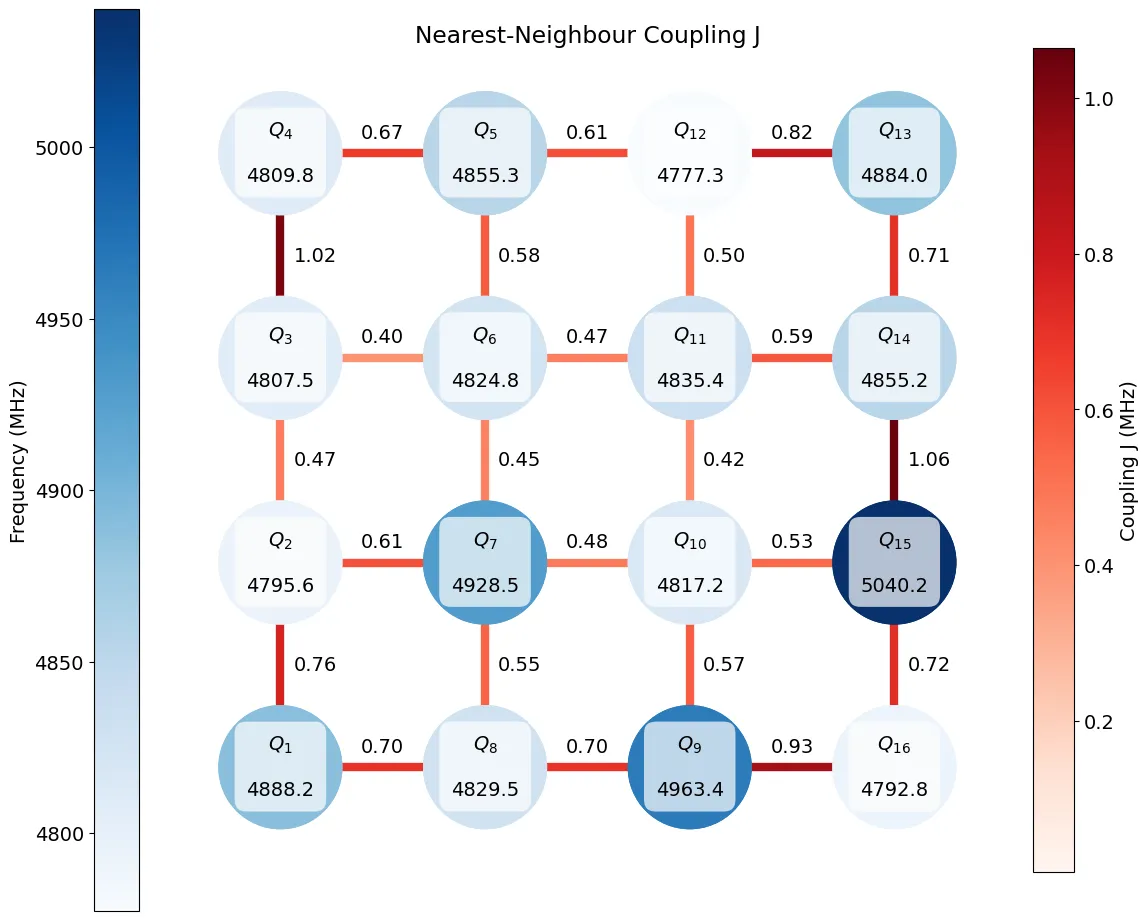

In [1]:
import numpy as np

In [2]:
qubits = [i+1 for i in range(16)]
qubits

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [3]:
import numpy as np
import scipy
from copy import deepcopy

t = np.pi*0.1

Define partial trace and Hermitian conjugate function

In [4]:
def ptrace(matrix,index=1,n1=2,n2=2):
    # Partial trace function for density matrices.
    current_tensor=matrix.reshape([n1, n2, n1, n2])
    if index == 1:
        return np.trace(current_tensor, axis1=1, axis2=3)
    elif index == 2:
        return np.trace(current_tensor, axis1=0, axis2=2)
    else:
        print('Error')

def dagger(u):
    return np.asarray(np.matrix(u).H)

def dprint(dictionary):
    print('Current states of all qubits in the circuit:')
    for key, value in dictionary.items():
        print(f"{key}:\n {value}")

def memory_usage_queries(D:dict, work_qubit:str, memory_qubit:str, U):
    print(f"MUQ on work qubit {work_qubit} and memory qubit {memory_qubit}")
    
    # Perform the Kronecker product between the two qubits
    qubit_product = np.kron(D[work_qubit], D[memory_qubit])
    
    # Apply the unitary transformation and its conjugate transpose
    qubit_swapped = U @ qubit_product @ dagger(U)
    
    # Update the dictionary with the partial trace results
    D[work_qubit] = ptrace(qubit_swapped, index=1)
    D[memory_qubit] = ptrace(qubit_swapped, index=2)
    return D

Pauli matrices etc

In [5]:
swap = np.array([[1, 0, 0, 0],
            [0, 0, 1, 0],
            [0, 1, 0, 0],
            [0, 0, 0, 1]])

U = scipy.linalg.expm(-1j*t*swap)

Define the qubit initial density matrices

In [6]:
ket_plus = np.array([[1/np.sqrt(2)],[1/np.sqrt(2)]])
rho_plus = np.outer(ket_plus,ket_plus)

ket_0 = np.array([[1],[0]])
rho_0 = np.outer(ket_0,ket_0)

## Initialization

We initialize qubits 3, 8, 12, 15 in state $\ket{0}$

We initialize the rest of the qubit in state $\ket{+}$


In [7]:
initialization = {
    'q1': rho_plus,
    'q2': rho_plus,
    'q3': rho_0,
    'q4': rho_plus,
    'q5': rho_plus,
    'q6': rho_plus,
    'q7': rho_plus,
    'q8': rho_0,
    'q9': rho_plus,
    'q10': rho_plus,
    'q11': rho_plus,
    'q12': rho_0,
    'q13': rho_plus,
    'q14': rho_plus,
    'q15': rho_0,
    'q16': rho_plus
}


## 1. First memory call

The first memory call is $\sigma_0 \to \sigma_1 = e^{-i 3t\ket{+}\bra{+}}\sigma_0$

To approximate this memory call, we use the first recursion step F. This recursion step use 3 memory qubits (use 3 memory usage queries - MUQs). We label F1, F2 and F3 the time stamp where the respective memory qubit is consumed.

We perform 4 of this recursion step in parallel, using 3 qubits surrounding q3, q8, q12 and q16.

### F1: First recursion step, first MUQ (first memory qubit consumed)

In [8]:
F1 = deepcopy(initialization)

F1 = memory_usage_queries(F1,'q3','q2',U)
F1 = memory_usage_queries(F1,'q8','q7',U)
F1 = memory_usage_queries(F1,'q12','q5',U)
F1 = memory_usage_queries(F1,'q15','q10',U)

dprint(F1)


MUQ on work qubit q3 and memory qubit q2
MUQ on work qubit q8 and memory qubit q7
MUQ on work qubit q12 and memory qubit q5
MUQ on work qubit q15 and memory qubit q10
Current states of all qubits in the circuit:
q1:
 [[0.5 0.5]
 [0.5 0.5]]
q2:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q3:
 [[0.95225425+0.j         0.04774575+0.14694631j]
 [0.04774575-0.14694631j 0.04774575+0.j        ]]
q4:
 [[0.5 0.5]
 [0.5 0.5]]
q5:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q6:
 [[0.5 0.5]
 [0.5 0.5]]
q7:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q8:
 [[0.95225425+0.j         0.04774575+0.14694631j]
 [0.04774575-0.14694631j 0.04774575+0.j        ]]
q9:
 [[0.5 0.5]
 [0.5 0.5]]
q10:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q11:
 [[0.5 0.5]
 [0.5 0.5]]
q12:
 [[0.95225425+0.j

### F2: First recursion step, second MUQ (second memory qubit consumed)

In [9]:
F2 = deepcopy(F1)

F2 = memory_usage_queries(F2,'q3','q6',U)
F2 = memory_usage_queries(F2,'q8','q1',U)
F2 = memory_usage_queries(F2,'q12','q11',U)
F2 = memory_usage_queries(F2,'q15','q14',U)

dprint(F2)


MUQ on work qubit q3 and memory qubit q6
MUQ on work qubit q8 and memory qubit q1
MUQ on work qubit q12 and memory qubit q11
MUQ on work qubit q15 and memory qubit q14
Current states of all qubits in the circuit:
q1:
 [[0.58637288-2.77555756e-17j 0.45681356-1.18882065e-01j]
 [0.45681356+1.18882065e-01j 0.41362712+0.00000000e+00j]]
q2:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q3:
 [[0.86588137-2.77555756e-17j 0.09093219+2.65828378e-01j]
 [0.09093219-2.65828378e-01j 0.13411863+0.00000000e+00j]]
q4:
 [[0.5 0.5]
 [0.5 0.5]]
q5:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q6:
 [[0.58637288-2.77555756e-17j 0.45681356-1.18882065e-01j]
 [0.45681356+1.18882065e-01j 0.41362712+0.00000000e+00j]]
q7:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q8:
 [[0.86588137-2.77555756e-17j 0.09093219+2.65828378e-01j]
 [0.09093219-2.65828378e-

### F3: First recursion step, third MUQ (third memory qubit consumed)

In [10]:
F3 = deepcopy(F2)

F3 = memory_usage_queries(F3,'q3','q4',U)
F3 = memory_usage_queries(F3,'q8','q9',U)
F3 = memory_usage_queries(F3,'q12','q13',U)
F3 = memory_usage_queries(F3,'q15','q16',U)

dprint(F3)


MUQ on work qubit q3 and memory qubit q4
MUQ on work qubit q8 and memory qubit q9
MUQ on work qubit q12 and memory qubit q13
MUQ on work qubit q15 and memory qubit q16
Current states of all qubits in the circuit:
q1:
 [[0.58637288-2.77555756e-17j 0.45681356-1.18882065e-01j]
 [0.45681356+1.18882065e-01j 0.41362712+0.00000000e+00j]]
q2:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q3:
 [[0.75281781-1.38777878e-17j 0.12999469+3.47973864e-01j]
 [0.12999469-3.47973864e-01j 0.24718219+3.46944695e-18j]]
q4:
 [[0.61306356+0.00000000e+00j 0.4609375 -8.21454863e-02j]
 [0.4609375 +8.21454863e-02j 0.38693644-1.04083409e-17j]]
q5:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q6:
 [[0.58637288-2.77555756e-17j 0.45681356-1.18882065e-01j]
 [0.45681356+1.18882065e-01j 0.41362712+0.00000000e+00j]]
q7:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j      

## Prepare 1: SWAP the qubit to prepare for the next recursion

We swap:
- q3-q6
- q7-q8
- q11-q12
- q10-q15


In [11]:
prepare_1 = deepcopy(F3)
prepare_1['q3'], prepare_1['q6'] = prepare_1['q6'], prepare_1['q3']
prepare_1['q7'], prepare_1['q8'] = prepare_1['q8'], prepare_1['q7']
prepare_1['q11'], prepare_1['q12'] = prepare_1['q12'], prepare_1['q11']
prepare_1['q10'], prepare_1['q15'] = prepare_1['q15'], prepare_1['q10']

dprint(prepare_1)

Current states of all qubits in the circuit:
q1:
 [[0.58637288-2.77555756e-17j 0.45681356-1.18882065e-01j]
 [0.45681356+1.18882065e-01j 0.41362712+0.00000000e+00j]]
q2:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q3:
 [[0.58637288-2.77555756e-17j 0.45681356-1.18882065e-01j]
 [0.45681356+1.18882065e-01j 0.41362712+0.00000000e+00j]]
q4:
 [[0.61306356+0.00000000e+00j 0.4609375 -8.21454863e-02j]
 [0.4609375 +8.21454863e-02j 0.38693644-1.04083409e-17j]]
q5:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q6:
 [[0.75281781-1.38777878e-17j 0.12999469+3.47973864e-01j]
 [0.12999469-3.47973864e-01j 0.24718219+3.46944695e-18j]]
q7:
 [[0.75281781-1.38777878e-17j 0.12999469+3.47973864e-01j]
 [0.12999469-3.47973864e-01j 0.24718219+3.46944695e-18j]]
q8:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q9:
 [[0.61306356+0.00000000e+00j 0.4609375

## 2. Second memory call

The second memory call is $\sigma_1 \to \sigma_2 = e^{-i 3t\sigma_1}\sigma_1$

To approximate this memory call, we use the second recursion step S. This recursion step use 3 memory qubits (use 3 memory usage queries - MUQs). We label S1, S2 and S3 the time stamp where the respective memory qubit is consumed.

### S1: Second recursion step, first MUQ

In [12]:
S1 = deepcopy(prepare_1)
S1 = memory_usage_queries(S1,'q11','q6',U)
dprint(S1)

MUQ on work qubit q11 and memory qubit q6
Current states of all qubits in the circuit:
q1:
 [[0.58637288-2.77555756e-17j 0.45681356-1.18882065e-01j]
 [0.45681356+1.18882065e-01j 0.41362712+0.00000000e+00j]]
q2:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q3:
 [[0.58637288-2.77555756e-17j 0.45681356-1.18882065e-01j]
 [0.45681356+1.18882065e-01j 0.41362712+0.00000000e+00j]]
q4:
 [[0.61306356+0.00000000e+00j 0.4609375 -8.21454863e-02j]
 [0.4609375 +8.21454863e-02j 0.38693644-1.04083409e-17j]]
q5:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q6:
 [[0.75281781-2.77555756e-17j 0.12999469+3.47973864e-01j]
 [0.12999469-3.47973864e-01j 0.24718219-3.46944695e-18j]]
q7:
 [[0.75281781-1.38777878e-17j 0.12999469+3.47973864e-01j]
 [0.12999469-3.47973864e-01j 0.24718219+3.46944695e-18j]]
q8:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q

### S2: Second recursion step, second MUQ

In [13]:
S2 = deepcopy(S1)
S2 = memory_usage_queries(S2,'q11','q10',U)
dprint(S2)

MUQ on work qubit q11 and memory qubit q10
Current states of all qubits in the circuit:
q1:
 [[0.58637288-2.77555756e-17j 0.45681356-1.18882065e-01j]
 [0.45681356+1.18882065e-01j 0.41362712+0.00000000e+00j]]
q2:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q3:
 [[0.58637288-2.77555756e-17j 0.45681356-1.18882065e-01j]
 [0.45681356+1.18882065e-01j 0.41362712+0.00000000e+00j]]
q4:
 [[0.61306356+0.00000000e+00j 0.4609375 -8.21454863e-02j]
 [0.4609375 +8.21454863e-02j 0.38693644-1.04083409e-17j]]
q5:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q6:
 [[0.75281781-2.77555756e-17j 0.12999469+3.47973864e-01j]
 [0.12999469-3.47973864e-01j 0.24718219-3.46944695e-18j]]
q7:
 [[0.75281781-1.38777878e-17j 0.12999469+3.47973864e-01j]
 [0.12999469-3.47973864e-01j 0.24718219+3.46944695e-18j]]
q8:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]


## Prepare 2: SWAP the qubit to prepare for the next MUQ

We swap q6-q7

In [14]:
prepare_2 = deepcopy(S2)
prepare_2['q7'], prepare_2['q6'] = prepare_2['q6'], prepare_2['q7']

dprint(prepare_2)

Current states of all qubits in the circuit:
q1:
 [[0.58637288-2.77555756e-17j 0.45681356-1.18882065e-01j]
 [0.45681356+1.18882065e-01j 0.41362712+0.00000000e+00j]]
q2:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q3:
 [[0.58637288-2.77555756e-17j 0.45681356-1.18882065e-01j]
 [0.45681356+1.18882065e-01j 0.41362712+0.00000000e+00j]]
q4:
 [[0.61306356+0.00000000e+00j 0.4609375 -8.21454863e-02j]
 [0.4609375 +8.21454863e-02j 0.38693644-1.04083409e-17j]]
q5:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q6:
 [[0.75281781-1.38777878e-17j 0.12999469+3.47973864e-01j]
 [0.12999469-3.47973864e-01j 0.24718219+3.46944695e-18j]]
q7:
 [[0.75281781-2.77555756e-17j 0.12999469+3.47973864e-01j]
 [0.12999469-3.47973864e-01j 0.24718219-3.46944695e-18j]]
q8:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q9:
 [[0.61306356+0.00000000e+00j 0.4609375

### S3: Second recursion step, third MUQ

In [15]:
S3 = deepcopy(S2)
S3 = memory_usage_queries(S3,'q11','q7',U)
dprint(S3)

MUQ on work qubit q11 and memory qubit q7
Current states of all qubits in the circuit:
q1:
 [[0.58637288-2.77555756e-17j 0.45681356-1.18882065e-01j]
 [0.45681356+1.18882065e-01j 0.41362712+0.00000000e+00j]]
q2:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q3:
 [[0.58637288-2.77555756e-17j 0.45681356-1.18882065e-01j]
 [0.45681356+1.18882065e-01j 0.41362712+0.00000000e+00j]]
q4:
 [[0.61306356+0.00000000e+00j 0.4609375 -8.21454863e-02j]
 [0.4609375 +8.21454863e-02j 0.38693644-1.04083409e-17j]]
q5:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q6:
 [[0.75281781-2.77555756e-17j 0.12999469+3.47973864e-01j]
 [0.12999469-3.47973864e-01j 0.24718219-3.46944695e-18j]]
q7:
 [[0.75281781-6.93889390e-18j 0.12999469+3.47973864e-01j]
 [0.12999469-3.47973864e-01j 0.24718219-6.93889390e-18j]]
q8:
 [[0.54774575+0.j         0.45225425-0.14694631j]
 [0.45225425+0.14694631j 0.45225425+0.j        ]]
q